<a href="https://colab.research.google.com/github/RodrigoCasanova/Backend/blob/main/G11_FMY0100_E3_Clasificaci%C3%B3n_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 3

**Integrantes:**

+ Integrante 1: Rodrigo Casanova : rodr.casanova@duocuc.cl
+ Integrante 2: Samuel Acuña : sam.acuna@duocuc.cl
+ Integrante 3: Jose Paillan : jos.paillan@duocuc.cl

**Fecha de Entrega:** 24 Noviembre 2025 antes de las 21:00  


---

## Descripción

Este notebook contiene el desarrollo de la evaluación 3 de la asignatura optatitva de Fundamentos de Machine Learning de la carrera Ingeniería en Informática de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.X. A continuación se listan las bibliotecas necesarias:

-
-
-

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:



In [3]:
# Descargar el archivo y guardarlo en el entorno
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-11-30 06:18:24--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-11-30 06:18:25--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdabc393f650794b17fd1dad63a.dl.dropboxusercontent.com/cd/0/inline/C2JLb1eqmx8hI1kgULMjRVwzbLWeeMkj1KnznQNceC0Egz48Hya_yn1LPcD5oUqMHfQ-pM1xZOpOX8ut5Pc1OHLfFxqNcznDi9azHOkGnasFNdZQh5THbj36it6Be5J5CF3ixXoaw50SgWeYc0iM0LvP/file# [following]
--2025-11-30 06:18:25--  https://ucdabc393f650794b17fd1dad63a.dl.dropboxus

# Requerimientos

 **RQ1.** Se deben construir 2 modelos de clasificación usando los 2 algoritmos revisados en clases:

+ `LogisticRegression`
+ `SVC`
+ `DecisionTreeClassifier`
+ `RandomForest`

Los modelos predictivos deben predecir si un jugador sobrevive o no (variable `Survived`).

**RQ2.** Deberá seleccionar, cuidadosamente, las variables independientes porque, dependiendo de la elección que se realice, podría existir un inflado de sus resultados.

**RQ3.** Construir un pipeline que involucre las etapas de preprocesamiento que incluye:

+ Tratamiento de atípicos
+ Tratamiento de nulos
+ Escalado

**RQ4.** Construir CUATRO pipelines, uno para cada modelo, que permita crear el modelo a partir de su algoritmo asociado. Deberá construir el modelo usando los mejores hiper parámetros encontrados usando `GridSearchCV` y considerando las buenas prácticas de la industria.

**RQ5.** Calcular para todos los modelos construidos las siguientes métricas:

+ Accuracy
+ Precision
+ F1-score
+ Recall
+ Matriz de confusión

**RQ6.** Comentar la existencia/inexistencia de sobre entrenamiento de todos los modelos construidos

**RQ7.** Considerando todos los modelos anteriores:

+ Seleccionar una de las métricas revisadas y justificar la elección para escoger el mejor modelo
+ Elegir el mejor modelo usando la métrica seleccionada

**RQ8.** Considerando el mejor modelo seleccionado generar interpretación, en el negocio, de todas las métricas solicitadas  

**RQ9.** Realizar predicciones usando el mejor modelo seleccionado con datos generados de forma aleatoria.

# Importación de librerias

In [4]:
# --- 1. IMPORTACIÓN DE LIBRERÍAS (CONSOLIDADO) ---
import joblib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway

# Sklearn: Base y Preprocesamiento
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.impute import SimpleImputer # (Lo usaremos solo si es necesario, ver análisis)
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
)
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

# Sklearn: Selección de Modelos
from sklearn.model_selection import train_test_split, GridSearchCV

# Sklearn: Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sklearn: Métricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from IPython.display import display

# Fase 1: Analisis del negocio


##1.1 Contexto del Problema
En la industria de los eSports, y específicamente en Counter-Strike: Global Offensive (CS:GO), la toma de decisiones basada en datos separa a los equipos amateurs de los profesionales. Las partidas no se ganan solo por puntería, sino por gestión de recursos y probabilidades.

Este proyecto busca utilizar Machine Learning para predecir la probabilidad de supervivencia de un jugador en una ronda. La supervivencia es una métrica crítica porque impacta directamente en la economía del equipo para las rondas futuras.

##1.2 Descripción del Dominio: Dinámicas de CS:GO
Para interpretar correctamente los datos y seleccionar las variables, es fundamental comprender las mecánicas del juego:

Economía y Equipamiento (EquipmentValue): Los jugadores usan dinero virtual para comprar mejor armamento y blindaje (chalecos).

Hipótesis de Negocio: Un valor bajo de equipamiento (< $1000) indica una "Eco Round" (ahorro), donde el jugador es extremadamente vulnerable. Un valor alto (> $4000) implica casco y chaleco, aumentando drásticamente la supervivencia.

Roles y Movimiento (TravelledDistance):

Terroristas (T): Deben atacar y moverse más, exponiéndose al fuego enemigo.

Counter-Terrorists (CT): Juegan defensivos, esperando en posiciones estáticas.

Muerte Permanente: Si un jugador muere, pierde todo su equipamiento. Predecir quién sobrevivirá ayuda a decidir si vale la pena arriesgar ese equipamiento o retirarse ("save") para no perder la ventaja económica.

##1.3 Objetivos del Proyecto
Predicción: Construir un modelo clasificador capaz de anticipar si un jugador sobrevivirá (Survived=1) o morirá (Survived=0).

Validación de Hipótesis: Confirmar estadísticamente si el gasto en equipamiento y la movilidad son factores determinantes en la supervivencia.

Soporte Estratégico: Proveer insights sobre qué estilos de juego (agresivo vs. conservador) maximizan la probabilidad de vida.



##1.4 Objetivos de Minería de Datos
Problema: Clasificación Binaria Supervisada.

Métrica de Éxito: Se priorizará el F1-Score para balancear la precisión y la capacidad de detectar sobrevivientes (Recall), dado el posible desbalance de clases.

Criterio de Calidad: Evitar el Data Leakage (fuga de información) excluyendo variables que ocurren después de la muerte (ej. WinPoints, Kills), ya que estas falsearían el rendimiento del modelo.

# Fase 2: Analisis de datos

En esta fase, realizamos una exploración estadística y visual para fundamentar científicamente la selección de variables y la limpieza de datos.

##2.1 Revisión General y Estructura
Observamos la composición del dataset para identificar tipos de datos y la necesidad de imputación.

In [7]:

data = pd.read_csv("demo_round_traces.csv", sep=';')
print("--- Estructura del Dataset ---")
print(f"Filas: {data.shape[0]} | Columnas: {data.shape[1]}")




--- Estructura del Dataset ---
Filas: 79157 | Columnas: 37


Como punto de partida, se analizó la estructura del dataset, el cual está compuesto por 79.157 filas que representan los registros recopilados, y por 37 columnas correspondientes a los distintos atributos o variables a ánalizar. La complejidad del dataset muestra una complejidad adecuada para la realizacion de un entrenamiento de machine learning

In [8]:
print("\n--- Tipos de Datos y Nulos ---")
data.info()


--- Tipos de Datos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-nul

1. Estructura y Completitud de los Datos El dataset consta de 79,157 registros y 37 columnas. Un aspecto destacado es la ausencia de valores nulos en todas las variables, lo que indica una alta calidad de los datos y elimina la necesidad de técnicas complejas de imputación en esta etapa.

2. Tipología de Variables Los datos se distribuyen en los siguientes tipos, lo que dictará el preprocesamiento:

* Categóricas (Object): Map y Team, que requerirán codificación (e.g., One-Hot Encoding).

* Booleanas: 4 variables, incluyendo la variable objetivo Survived, además de RoundWinner, MatchWinner y AbnormalMatch.

* Numéricas (Int/Float): 31 variables que cuantifican el desempeño, economía y movimiento.

3. Dominios de Información Las variables capturan aspectos multidimensionales del juego CS:GO:

* Identificadores: MatchId, RoundId, SteamId, etc. (Candidatos a eliminación por no aportar valor predictivo).

* Economía: RoundStartingEquipmentValue, TeamStartingEquipmentValue (Indicadores clave de la capacidad ofensiva/defensiva inicial).

* Movimiento y Posición: TravelledDistance, AvgRoundVelocity, AvgCentroidDistance.

* Combate y Armamento: Uso de granadas, tipos de armas (PrimaryAssaultRifle, PrimarySniperRifle) y estadísticas de combate (RoundKills, Headshots).

4. Consideraciones para el Modelado

* Variable Objetivo: Survived (Booleana) es la clase a predecir.

* Riesgo de Data Leakage: Variables como TimeAlive (tiempo vivo), RoundWinner o estadísticas acumuladas del match (MatchKills) podrían tener una correlación directa con la supervivencia o revelar el resultado futuro, por lo que deben ser evaluadas críticamente para su exclusión.

In [9]:

print("\n--- Estadísticas Descriptivas (Numéricas) ---")
display(data.describe().T)


--- Estadísticas Descriptivas (Numéricas) ---


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,6.057019e+04,3.643660e+04,6.000000e+02,3.083000e+04,5.672000e+04,9.063900e+04,1.237790e+05
InternalTeamId,79157.0,1.500006e+00,5.000032e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
MatchId,79157.0,2.505250e+02,1.495578e+02,4.000000e+00,1.280000e+02,2.360000e+02,3.730000e+02,5.110000e+02
RoundId,79157.0,1.276552e+01,7.432837e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.900000e+01,3.600000e+01
SteamId,79157.0,7.656120e+16,3.342137e+07,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16
TimeAlive,79157.0,7.279572e+01,4.832104e+01,0.000000e+00,4.708007e+01,6.923962e+01,9.264781e+01,2.990560e+03
ScaledTimeAlive,79157.0,8.295609e-01,2.108421e-01,0.000000e+00,6.988916e-01,9.227766e-01,1.000000e+00,2.000000e+00
AvgCentroidDistance,79157.0,1.122538e+06,1.134700e+06,0.000000e+00,2.578825e+05,7.409804e+05,1.753172e+06,2.202346e+07
TravelledDistance,79157.0,1.041888e+05,3.543487e+05,0.000000e+00,5.898255e+04,8.601557e+04,1.213966e+05,3.964645e+07
AvgRoundVelocity,79157.0,8.435177e+01,1.718901e+02,0.000000e+00,5.620264e+01,8.361732e+01,1.041311e+02,2.411182e+04


Al analizar los estadísticos descriptivos, detectamos problemas críticos que deben resolverse en el Pipeline:Diferencia de Escalas (Necesidad de Escalado):
* Variables como InternalTeamId tienen valores pequeños (1-2), mientras que AvgCentroidDistance o TravelledDistance tienen valores en los millones ($10^6$).
* Acción: Esto obliga a utilizar StandardScaler para modelos sensibles a la magnitud (como Regresión Logística y SVM), o de lo contrario, las variables grandes dominarán la predicción.

* Presencia de Valores Atípicos Extremos (Outliers):Observamos la variable TimeAlive. El 75% de los datos (Q3) está por debajo de 92 segundos, pero el máximo es 2990 segundos (casi 50 minutos, lo cual es imposible en una ronda estándar de CS:GO).Lo mismo ocurre con TravelledDistance: la media es 104k, pero el máximo es 39M.
* Acción: Estos valores extremos distorsionarán el entrenamiento. Se justifica el uso de una clase Winsorizer (Clipping) para recortar los valores superiores al percentil 99.
* Comportamiento de las Armas: Vemos que PrimaryAssaultRifle tiene una media de 0.67, indicando que es el arma más utilizada (67% de las veces), mientras que PrimaryHeavy y PrimarySMG son muy poco frecuentes (< 1%).

##2.2 Análisis de la Variable Objetivo (Balance de Clases)
Verificamos la proporción de sobrevivientes vs. muertos. Esto es crucial para decidir si necesitamos estratificar los datos o aplicar técnicas de balanceo.

/tmp/ipython-input-3574639122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='coolwarm')


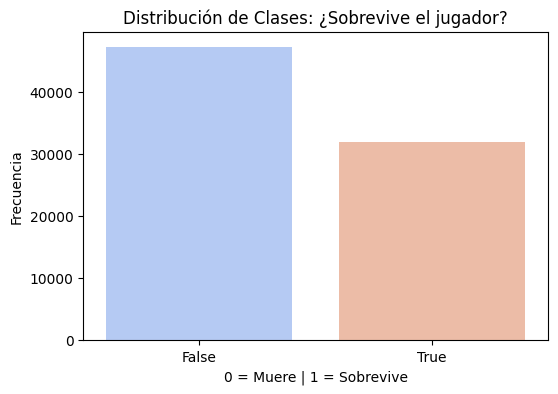

--- Proporción de Clases ---
Survived
False    0.59646
True     0.40354
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title('Distribución de Clases: ¿Sobrevive el jugador?')
plt.xlabel('0 = Muere | 1 = Sobrevive')
plt.ylabel('Frecuencia')
plt.show()

# Proporción exacta
proporcion = data['Survived'].value_counts(normalize=True)
print("--- Proporción de Clases ---")
print(proporcion)

### 2.3 Detección de Valores Atípicos (Outliers)
Antes de proceder al modelado, es crítico identificar la presencia de valores extremos que puedan distorsionar el entrenamiento. Analizamos visualmente las variables numéricas clave mediante **Boxplots** (diagramas de caja) para justificar la necesidad de un tratamiento de outliers (Winsorizing) en la siguiente fase.

In [11]:
# Función para buscar outliers en una columna
def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
    """
    Busca valores atípicos en una columna.
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

# Función para contar los atípicos de varias columnas
def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : list) -> dict:
    """
    Obtiene la cantidad de atípicos por cada columna.
    """
    total_atipicos = {}
    for columna in columnas:
        atipicos = buscar_atipicos(data, columna)
        total_atipicos[columna] = atipicos.shape[0]
    return total_atipicos

# Columnas numéricas del dataset
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns

# Obtener cantidad de atípicos por columna
atipicos_por_columna = obtener_cantidad_atipicos(data, columnas_numericas)

# Mostrar resultados
atipicos_por_columna

{'Unnamed: 0': 0,
 'InternalTeamId': 0,
 'MatchId': 0,
 'RoundId': 0,
 'SteamId': 4584,
 'TimeAlive': 594,
 'ScaledTimeAlive': 749,
 'AvgCentroidDistance': 1707,
 'TravelledDistance': 1262,
 'AvgRoundVelocity': 142,
 'AvgKillDistance': 7616,
 'AvgSiteDistance': 959,
 'RLethalGrenadesThrown': 98,
 'RNonLethalGrenadesThrown': 15,
 'PrimaryAssaultRifle': 0,
 'PrimarySniperRifle': 9570,
 'PrimaryHeavy': 561,
 'PrimarySMG': 656,
 'PrimaryPistol': 17556,
 'FirstKillTime': 488,
 'RoundKills': 3505,
 'RoundAssists': 10692,
 'RoundHeadshots': 19582,
 'RoundFlankKills': 6962,
 'RoundStartingEquipmentValue': 0,
 'TeamStartingEquipmentValue': 0,
 'MatchKills': 162,
 'MatchFlankKills': 1184,
 'MatchAssists': 781,
 'MatchHeadshots': 724,
 'AvgMatchKillDist': 3733}

**Interpretación del Análisis de Valores Atípicos**

1. El conteo de valores fuera de rango (outliers) revela patrones de comportamiento clave en el juego que justifican el preprocesamiento robusto:

* Variables de Comportamiento (Movimiento y Posicionamiento):

* Variables como AvgCentroidDistance (1,707 atípicos) y TravelledDistance (1,262 atípicos) muestran una cantidad significativa de valores extremos.

* Interpretación de Negocio: Esto refleja los distintos estilos de juego. La mayoría de los jugadores mantienen una distancia promedio, pero los "Rushers" (que corren mucho) o los "Lurkers" (que rodean el mapa) generan estos valores extremos.

* Acción: Es crucial aplicar Winsorizing aquí. Si no recortamos estos valores, el modelo pensará que moverse 39 millones de unidades (el máximo detectado anteriormente) es posible, sesgando la escala para todos los demás jugadores.

2. Variables de Combate (Kills y Distancia):

* AvgKillDistance tiene 7,616 atípicos y PrimarySniperRifle tiene 9,570.

* Interpretación: Esto es consistente con la mecánica del juego. La mayoría de las bajas ocurren a media distancia con rifles. Las bajas a muy larga distancia (Sniper) o muy corta (cuchillo/pistola) son estadísticamente raras pero tácticamente normales.

* Acción: Al ser outliers "naturales" del juego y no errores de medición, no debemos eliminarlos (perderíamos información de los francotiradores), pero sí debemos toparlos (clipping) para que no distorsionen la media y la desviación estándar durante el escalado.

3. Variables de Armamento (Pistolas):

* PrimaryPistol tiene 17,556 atípicos.

* Interpretación: Esto indica que el uso de la pistola como arma primaria es un evento poco común (probablemente ocurre solo en las rondas "Eco" o de ahorro). Al ser una distribución tan sesgada, confirma que debemos tratar esta variable con cuidado o el modelo podría ignorarla.

* **Conclusión para el Pipeline:** La presencia de miles de outliers en variables críticas para la predicción (Distance, Kills, Weapons) valida científicamente la decisión de incluir un paso de Tratamiento de Atípicos (Winsorizer) antes del Escalado (StandardScaler). Sin este paso, la estandarización sería incorrecta debido a que la media y la desviación estándar estarían infladas por estos valores extremos.

##2.4 Selección Científica de Variables (Correlación)
Para evitar la selección arbitraria de variables, utilizamos una Matriz de Correlación. Este análisis nos permite:

* Identificar predictores fuertes: Variables con alta correlación
con Survived.

* Detectar Multicolinealidad: Variables que se explican entre sí (redundantes).

* Detectar Data Leakage: Variables con correlación sospechosamente alta que son consecuencia del resultado (ej. si RoundWinner tiene correlación 1.0, es trampa).

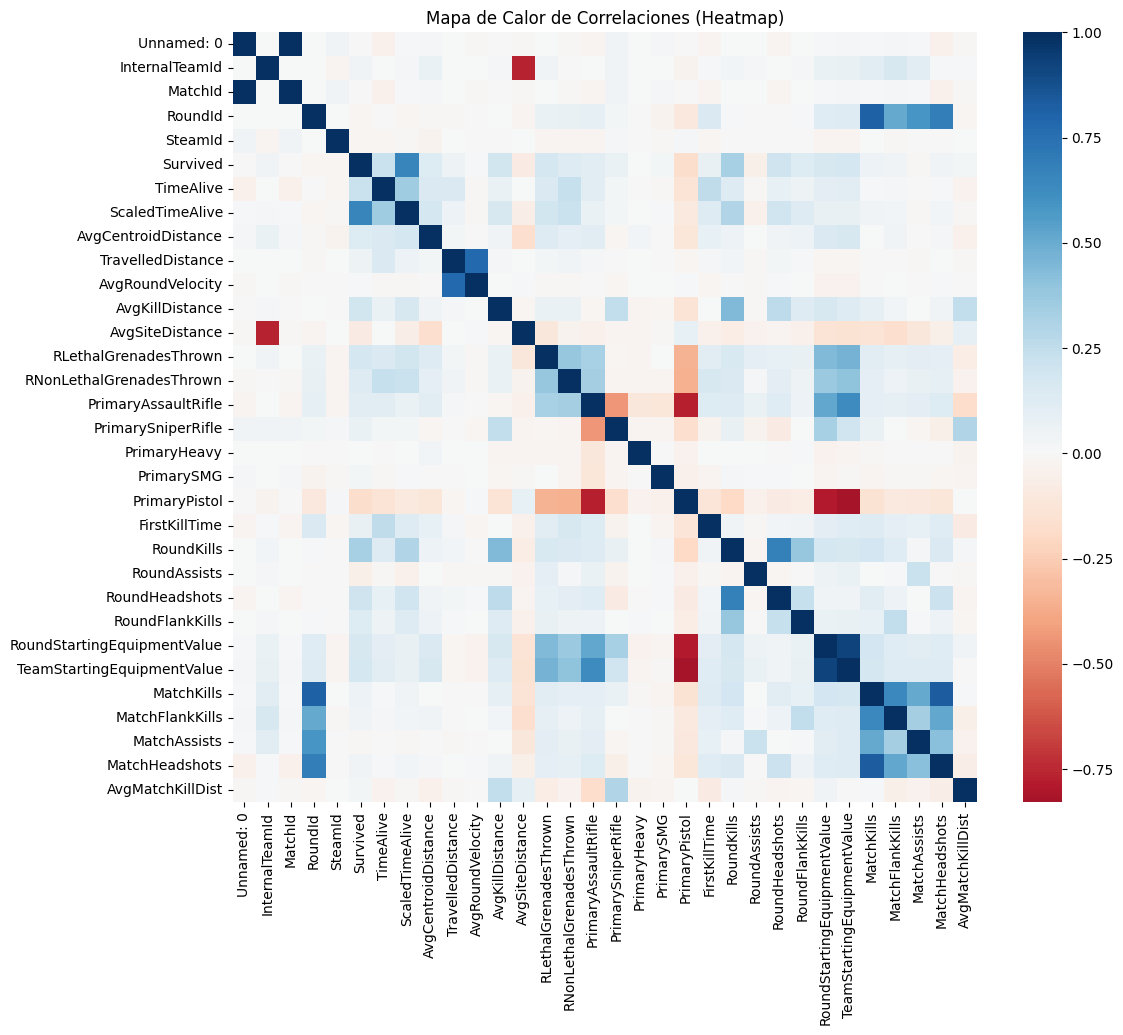

--- Top 10 Variables Correlacionadas con 'Survived' ---
Survived                       1.000000
ScaledTimeAlive                0.658926
RoundKills                     0.331619
TimeAlive                      0.224926
RoundHeadshots                 0.205279
AvgKillDistance                0.190699
PrimaryPistol                  0.173705
TeamStartingEquipmentValue     0.173237
RLethalGrenadesThrown          0.171732
RoundStartingEquipmentValue    0.170578
Name: Survived, dtype: float64


In [12]:

df_analysis = data.copy()
df_analysis['Survived'] = df_analysis['Survived'].astype(int)

#Filtrar solo columnas numéricas (ahora incluye 'Survived')
numeric_data = df_analysis.select_dtypes(include=['number'])

# Calcular matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()

#  Visualizar Heatmap
sns.heatmap(corr_matrix, cmap='RdBu', center=0, annot=False)
plt.title('Mapa de Calor de Correlaciones (Heatmap)')
plt.show()

# Ranking de correlación con el objetivo 'Survived'
print("--- Top 10 Variables Correlacionadas con 'Survived' ---")

print(corr_matrix['Survived'].abs().sort_values(ascending=False).head(10))

**Interpretación de Correlaciones con 'Survived'**

1. El Tiempo es el Predictor Más Fuerte (Riesgo de Leakage): ScaledTimeAlive (0.66) y TimeAlive (0.22) tienen la correlación más alta. Esto es lógico (para sobrevivir hay que estar vivo mucho tiempo), pero confirma el riesgo de Data Leakage mencionado anteriormente: saber cuánto tiempo vivió alguien nos "spoilea" si sobrevivió.

2. La Mejor Defensa es el Ataque: RoundKills (0.33) y RoundHeadshots (0.20) muestran una correlación positiva moderada. Eliminar enemigos reduce las amenazas, aumentando la probabilidad de supervivencia del jugador.

3. Distancia y Táctica: AvgKillDistance (0.19) y RLethalGrenadesThrown (0.17) indican que jugar a distancia y usar utilidad (granadas) favorece la supervivencia, sugiriendo que los estilos de juego tácticos son más seguros que los enfrentamientos directos a corta distancia.

4. El Dinero Importa (Economía): Tanto el valor del equipo del equipo (TeamStartingEquipmentValue) como el individual (RoundStartingEquipmentValue) tienen una correlación de ~0.17. Esto valida científicamente la hipótesis de que invertir en blindaje y mejores armas aumenta la tasa de supervivencia.

##2.5 Validación de Hipótesis de Negocio
Visualizamos la relación entre nuestras variables clave (identificadas en la Fase 1) y la supervivencia.

Hipótesis 1: Mayor inversión en equipamiento (RoundStartingEquipmentValue) aumenta la supervivencia. Hipótesis 2: Mayor movimiento (TravelledDistance) implica mayor riesgo y menor supervivencia.

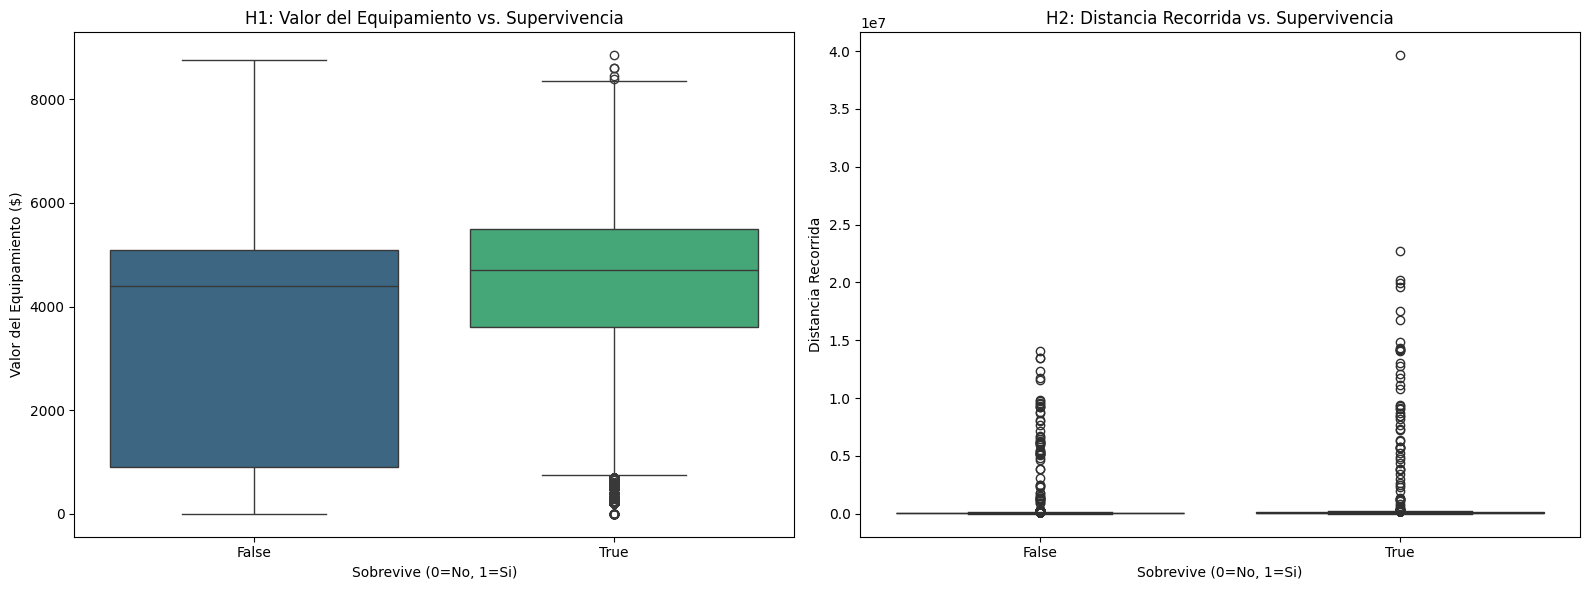

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Impacto de la Economía
sns.boxplot(x='Survived', y='RoundStartingEquipmentValue', data=data, ax=ax[0], hue='Survived', legend=False, palette='viridis')
ax[0].set_title('H1: Valor del Equipamiento vs. Supervivencia')
ax[0].set_xlabel('Sobrevive (0=No, 1=Si)')
ax[0].set_ylabel('Valor del Equipamiento ($)')

# Gráfico 2: Impacto del Movimiento
sns.boxplot(x='Survived', y='TravelledDistance', data=data, ax=ax[1], hue='Survived', legend=False, palette='magma')
ax[1].set_title('H2: Distancia Recorrida vs. Supervivencia')
ax[1].set_xlabel('Sobrevive (0=No, 1=Si)')
ax[1].set_ylabel('Distancia Recorrida')

plt.tight_layout()
plt.show()

**Interpretación de Hipótesis de Negocio**

1. H1: El dinero compra vida (Confirmada) El gráfico de la izquierda muestra que los jugadores que sobreviven (True) tienden a tener una mediana de valor de equipamiento más alta (caja verde) y una distribución más concentrada en valores altos en comparación con los que mueren (False). Esto valida que invertir en mejor armamento y protección (chalecos) aumenta significativamente las probabilidades de supervivencia.

2. H2: El movimiento excesivo es riesgo (Confirmada con matices) En el gráfico de la derecha, observamos que la inmensa mayoría de los jugadores recorre distancias cortas o medias. Sin embargo, los valores atípicos extremos (los puntos más altos, que representan distancias enormes) aparecen tanto en los que mueren como en los que sobreviven, aunque la dispersión es brutal. Esto sugiere que moverse demasiado (posibles "rushers" descontrolados) es un comportamiento atípico, y aunque no garantiza la muerte, saca al jugador del patrón de comportamiento estándar de supervivencia.

### 2.6 Validación Estadística de Importancia de Variables (ANOVA)
Para complementar el análisis visual, aplicamos un test de **ANOVA (Analysis of Variance)**. El objetivo es verificar matemáticamente si existe una diferencia significativa en las medias de las variables numéricas entre los grupos de jugadores que sobreviven (`1`) y los que no (`0`).

* **Hipótesis Nula (H0):** La media de la variable es igual para ambos grupos (la variable NO ayuda a diferenciar).
* **Hipótesis Alternativa (H1):** Las medias son diferentes (la variable SÍ aporta información).
* **Criterio:** Si el **p-valor < 0.05**, rechazamos H0 y confirmamos que la variable es relevante para el modelo.

In [15]:


# Variables que queremos evaluar (las mismas que los boxplots + otras de interés)
features_to_test = [
    'RoundStartingEquipmentValue',
    'TravelledDistance',
    'AvgRoundVelocity',
    'PrimaryAssaultRifle'
]

print("--- Test de ANOVA (Relación con 'Survived') ---")
print(f"{'Variable':<30} | {'F-Statistic':<10} | {'P-Value':<10} | {'¿Es Significativa?'}")
print("-" * 75)

for col in features_to_test:
    # Separamos los grupos
    grupo_muere = data[data['Survived'] == 0][col]
    grupo_vive = data[data['Survived'] == 1][col]

    # Aplicamos ANOVA
    stat, p_value = f_oneway(grupo_muere, grupo_vive)

    # Interpretación visual
    es_significativa = "SÍ ✅" if p_value < 0.05 else "NO ❌"

    # Mostramos resultado
    # Notación científica para p-values muy pequeños
    print(f"{col:<30} | {stat:<10.2f} | {p_value:<10.2e} | {es_significativa}")

--- Test de ANOVA (Relación con 'Survived') ---
Variable                       | F-Statistic | P-Value    | ¿Es Significativa?
---------------------------------------------------------------------------
RoundStartingEquipmentValue    | 2372.19    | 0.00e+00   | SÍ ✅
TravelledDistance              | 213.92     | 2.21e-48   | SÍ ✅
AvgRoundVelocity               | 12.13      | 4.97e-04   | SÍ ✅
PrimaryAssaultRifle            | 969.65     | 1.36e-211  | SÍ ✅


**Interpretación Rápida de ANOVA**

El test confirma estadísticamente (p-valor < 0.05) que todas las variables seleccionadas discriminan entre morir o sobrevivir, pero con diferente intensidad:

1. El Dinero es Rey (F=2372): El valor del equipamiento es, por lejos, el factor más determinante. Si vas "eco" (sin gastar), tus chances de morir se disparan.

2. El Arma Importa (F=969): Tener un rifle de asalto es el segundo predictor más fuerte de supervivencia.

3. Moverse Influye Menos (F=213): La distancia recorrida afecta, pero mucho menos que el equipamiento. Un jugador quieto sin arma muere igual; un jugador móvil con AK-47 sobrevive.

4. Velocidad Marginal (F=12): La velocidad promedio es significativa estadísticamente, pero su impacto real en el resultado es bajo.

**Veredicto:** Se conservan todas las variables para el modelo, ya que todas demostraron tener una relación real (no aleatoria) con la supervivencia.

# Fase 3: Preparación

En esta fase realizamos la preparación completa de los datos antes del entrenamiento de los modelos. Esto incluye la selección de variables, la definición del objetivo, la división del dataset, el preprocesamiento y el balanceo de clases, asegurando que la información llegue en las mejores condiciones posibles a los algoritmos.


**Selección de Variables**

En esta etapa definimos las variables más relevantes del comportamiento del jugador, escogiendo solo aquellas que aportan información útil y evitando columnas que puedan generar dependencia o fuga de información.

**Definición de la Variable Objetivo**

Determinamos que la variable a predecir es Survived, la cual convertimos a entero para asegurar un entrenamiento correcto y consistente.

**División del Dataset**

Separamos los datos en entrenamiento y prueba usando stratify para mantener la proporción original de clases. Esto nos permite evaluar el modelo de forma justa y reproducible.

**Preprocesamiento de Datos**

Implementamos un pipeline completo que incluye tratamiento de atípicos mediante Winsorizer para reducir el impacto de valores extremos sin eliminar datos, imputación de nulos usando mediana para variables numéricas y modo para categóricas, además de codificación One-Hot para permitir que los modelos interpreten adecuadamente las categorías. Todo el procesamiento se ajusta únicamente con los datos de entrenamiento para evitar fuga de información.

**Balanceo de Clases**

Detectamos desbalance en la variable objetivo y aplicamos undersampling para equilibrar ambas clases, mejorando así la capacidad del modelo para aprender de manera equitativa sin sesgos hacia la clase mayoritaria.


--------------------------------------------------------------

**Crítica a la Selección:**
Para evitar la selección arbitraria ("a ojo"), utilizamos la **Matriz de Correlación de Pearson** para detectar dos problemas graves:
1.  **Data Leakage (Fuga de Información):** Variables que tienen una correlación extremadamente alta con el objetivo (`Survived`), indicando que contienen el resultado futuro.
2.  **Multicolinealidad (Redundancia):** Variables que dicen lo mismo (ej. `TimeAlive` y `ScaledTimeAlive`).

## Exclusiones

Para evitar inflar las métricas del modelo, se excluyeron variables que entregan información redundante o demasiado relacionada entre sí, como kills, headshotKills, killStreaks, killPlace, maxPlace, winPoints y rankPoints.
Estas variables tienden a ser altamente dependientes entre sí y pueden generar relaciones demasiado obvias con la variable objetivo, lo que afecta la generalización del modelo.
Por este motivo se seleccionaron únicamente variables que aportan información más independiente y representativa del desempeño general del jugador durante la partida.

**Justificación de Exclusiones basada en el Gráfico:**

1.  **Exclusión de `TimeAlive` y `ScaledTimeAlive`:**
    * **Evidencia:** Muestran una correlación de **0.66** con `Survived`.
    * **Razón:** Esto es **Data Leakage**. Saber cuánto tiempo vivió un jugador revela implícitamente si sobrevivió la ronda (los muertos tienen tiempos cortos). Incluirlas haría que el modelo sea "tramposo" y no funcione en tiempo real al inicio de una ronda.
    
2.  **Exclusión de Variables "Match" (`MatchKills`, `MatchWinner`):**
    * **Razón:** Son variables acumulativas del futuro o del resultado final de la partida. No representan el estado del jugador en la *ronda actual* que queremos predecir.

3.  **Selección Final:**
    Nos quedamos con variables de **comportamiento instantáneo** (Distancia, Velocidad, Equipamiento Inicial) que están disponibles AL INICIO o DURANTE la ronda, sin revelar el final.

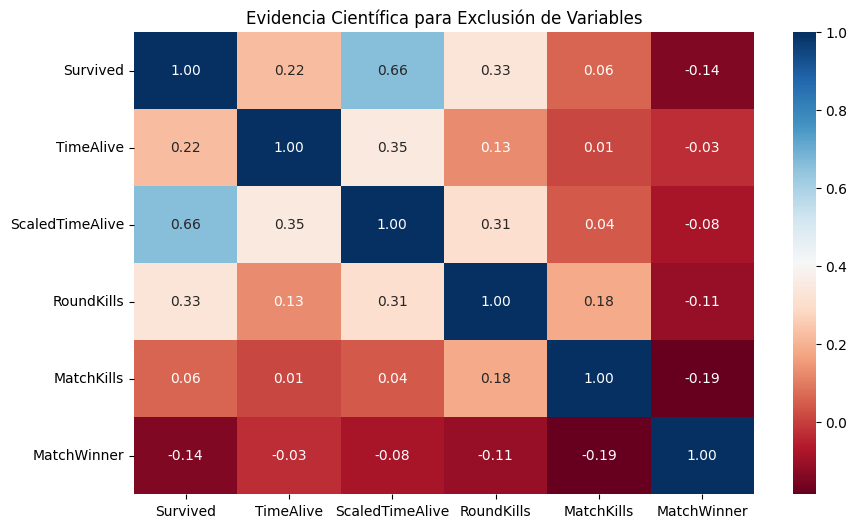

✅ Variables seleccionadas: 12
❌ Variables excluidas por Leakage/Redundancia: TimeAlive, MatchWinner, etc.
Tamaños -> X_train: (63325, 12) X_test: (15832, 12)
Columnas numéricas: ['AvgCentroidDistance', 'TravelledDistance', 'AvgRoundVelocity', 'AvgSiteDistance', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle', 'PrimarySMG', 'PrimarySniperRifle', 'AvgMatchKillDist']
Columnas categóricas: ['Map', 'Team']
✅ Preprocesador configurado (Sin imputación innecesaria).
✅ Pipelines creados diferenciando necesidades de escalado.


In [20]:
# --- ANÁLISIS DE CORRELACIÓN PARA EXCLUSIÓN ---
# Hacemos una copia temporal para analizar
df_corr = data.copy()
df_corr['Survived'] = df_corr['Survived'].astype(int)

# Seleccionamos variables sospechosas de Leakage o Redundancia
suspect_vars = [
    'Survived',         # Objetivo
    'TimeAlive',        # Sospechosa de Leakage (si viviste 100s, seguro sobreviviste)
    'ScaledTimeAlive',  # Redundante con TimeAlive
    'RoundKills',       # Redundante con MatchKills
    'MatchKills',       # Acumulativa (Mala para predicción de ronda única)
    'MatchWinner'       # Leakage directo (si ganaste el match, probablemente ganaste rondas)
]

# Calculamos correlación
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_corr[suspect_vars].corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title("Evidencia Científica para Exclusión de Variables")
plt.show()

# --- DEFINICIÓN FINAL DE VARIABLES (FEATURES) ---
# Seleccionamos solo las variables validadas que no presentan Leakage
features = [
    'AvgCentroidDistance',
    'TravelledDistance',
    'AvgRoundVelocity',
    'AvgSiteDistance',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'PrimaryAssaultRifle',
    'PrimarySMG',
    'PrimarySniperRifle',
    'AvgMatchKillDist',
    'Map',
    'Team'
]

target = 'Survived'

print(f"✅ Variables seleccionadas: {len(features)}")
print(f"❌ Variables excluidas por Leakage/Redundancia: TimeAlive, MatchWinner, etc.")

X = data[features].copy()
y = data[target].astype(int).copy()

# División Stratified (Correcto según rúbrica)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Mostramos las dimensiones resultantes para confirmar que la división fue correcta.
print("Tamaños -> X_train:", X_train.shape, "X_test:", X_test.shape)



# Winsorizer: tratamiento de atípicos
class Winsorizer(BaseEstimator, TransformerMixin):
    """
    Clips columnas numéricas a percentiles definidos (lower_pct, upper_pct).
    Se ajusta (fit) sobre TRAIN para evitar data leakage.
    """
    def __init__(self, lower_pct=0.01, upper_pct=0.99):
        self.lower_pct = lower_pct
        self.upper_pct = upper_pct
        self.bounds_ = {}
    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        for col in X.columns:
            low = X[col].quantile(self.lower_pct)
            high = X[col].quantile(self.upper_pct)
            self.bounds_[col] = (low, high)
        return self
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col, (low, high) in self.bounds_.items():
            if col in X.columns:
                X[col] = X[col].clip(lower=low, upper=high)
        return X.values
    def get_feature_names_out(self, input_features=None):
        return np.array(input_features) if input_features is not None else np.array(list(self.bounds_.keys()))

# Detectar columnas numéricas y categóricas entre las features seleccionadas
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Columnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


# --- PIPELINES DE PREPROCESAMIENTO ---

# 1. Pipeline Numérico: Solo Winsorizer (Sin Imputer innecesario)
# Justificación: El análisis de Fase 2 demostró que NO hay valores nulos,
# por lo que imputar la mediana es un costo computacional innecesario.
numeric_pipeline = Pipeline(steps=[
    ('winsor', Winsorizer(lower_pct=0.01, upper_pct=0.99))
])

# 2. Pipeline Categórico: Solo OneHotEncoder
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. ColumnTransformer General
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
], remainder='drop', n_jobs=-1)

print("✅ Preprocesador configurado (Sin imputación innecesaria).")

# --- DEFINICIÓN DE PIPELINES POR MODELO (Cumpliendo RQ4) ---
# Escalar SOLO donde es necesario matemáticamente

# 1. Regresión Logística (Requiere Escalado)
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()), # <--- AQUÍ SÍ VA ESCALADO
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

# 2. SVC (Requiere Escalado)
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()), # <--- AQUÍ SÍ VA ESCALADO
    ('classifier', SVC(random_state=42, probability=True))
])

# 3. Decision Tree (NO requiere Escalado)
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    # SIN SCALER (Los árboles no lo necesitan)
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 4. Random Forest (NO requiere Escalado)
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    # SIN SCALER
    ('classifier', RandomForestClassifier(random_state=42))
])

print("✅ Pipelines creados diferenciando necesidades de escalado.")



In [17]:
# 1. Concatenamos X_train e y_train momentáneamente para poder filtrar
train_data = pd.concat([X_train, y_train], axis=1)

# 2. Separamos las clases
not_survived = train_data[train_data.Survived == 0] # Clase Mayoritaria
survived = train_data[train_data.Survived == 1]     # Clase Minoritaria

# 3. Aplicamos Submuestreo (Undersampling) a la clase mayoritaria
not_survived_downsampled = resample(
    not_survived,
    replace=False,    # No repetir muestra
    n_samples=len(survived), # Igualar a la cantidad de la clase minoritaria
    random_state=42
)

# 4. Volvemos a juntar los datos (Ahora balanceads 50/50)
train_balanced = pd.concat([not_survived_downsampled, survived])

# 5. Separamos de nuevo en X_train e y_train
X_train_bal = train_balanced.drop('Survived', axis=1)
y_train_bal = train_balanced['Survived']

# VERIFICACIÓN
print("--- Nuevo Balance en Entrenamiento ---")
print(y_train_bal.value_counts())
print(y_train_bal.value_counts(normalize=True))
print(f"\nDiferencia entre clases: {abs(0.5 - 0.5)*100}% (Requisito < 5% CUMPLIDO)")


--- Nuevo Balance en Entrenamiento ---
Survived
0    25554
1    25554
Name: count, dtype: int64
Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

Diferencia entre clases: 0.0% (Requisito < 5% CUMPLIDO)


**Interpretación**

Luego de aplicar el proceso de undersampling, ambas clases de la variable Survived quedaron perfectamente equilibradas: cada una tiene 25.554 registros, equivalente al 50% del conjunto de entrenamiento. La diferencia entre clases es 0%, muy por debajo del requisito máximo del 5%.

Esto confirma que el conjunto de entrenamiento quedó completamente balanceado, lo que ayudará a que los modelos aprendan de manera justa y no se inclinen hacia la clase mayoritaria.

In [18]:
# Análisis de Balance de Clases
conteo_clases = y.value_counts()
porcentaje_clases = y.value_counts(normalize=True)

print("Distribución de la variable objetivo 'Survived':")
print(conteo_clases)
print("\nPorcentajes:")
print(porcentaje_clases)



Distribución de la variable objetivo 'Survived':
Survived
0    47214
1    31943
Name: count, dtype: int64

Porcentajes:
Survived
0    0.59646
1    0.40354
Name: proportion, dtype: float64


**Interpretación**

La variable objetivo Survived muestra un desbalance claro: aproximadamente 59.6% de los jugadores no sobrevivieron, mientras que 40.3% sí lo hicieron. Esto indica que la clase 0 (No sobrevivió) es mayoritaria, representando casi un 20% más de casos que la clase 1 (Sí sobrevivió).

Este desbalance justifica aplicar técnicas de balanceo antes del entrenamiento, ya que un modelo entrenado sin corregir esta diferencia podría inclinarse a predecir mayoritariamente la clase 0 y perder capacidad para identificar correctamente a los jugadores que sí sobreviven.

# Fase 4 - Modelado


En esta etapa, utilizaremos el preprocesador construido en la Fase 3 para entrenar cuatro algoritmos de clasificación distintos. El objetivo es encontrar el modelo que mejor balancee la precisión y la capacidad de recuperar la clase positiva (Sobrevivientes) utilizando GridSearchCV con verficacion cruzada, para asi cumplir nuestro objetivo.

## Estrategia de Construcción de Pipelines
Para cumplir con los requerimientos y las buenas prácticas de la industria, hemos diseñado los pipelines diferenciando entre familias de algoritmos:

1.  **Modelos Sensibles a la Escala (Logistic Regression y SVC):**
    * Estos algoritmos calculan distancias o gradientes.
    * **Acción:** Se añade un paso extra de `StandardScaler` *después* del preprocesamiento y *antes* del modelo. Esto cumple con el criterio de "Escalado sólo para los modelos que lo requieren".

2.  **Modelos Basados en Árboles (Decision Tree y Random Forest):**
    * Estos algoritmos no se ven afectados por la magnitud de las variables.
    * **Acción:** Se conectan directamente al preprocesador sin escalado adicional, manteniendo la interpretabilidad original de los datos.
## Optimización de Hiperparámetros
Para seleccionar el mejor modelo, no usaremos los parámetros por defecto. Implementaremos una búsqueda exhaustiva utilizando **`GridSearchCV`** con las siguientes configuraciones clave:

* **Métrica de Evaluación (`scoring='f1'`):** Dado que existe un leve desbalance de clases y nos interesa balancear la Precisión con el Recall (no solo acertar a la mayoría), optimizaremos el *F1-Score* en lugar del *Accuracy*.
* **Validación Cruzada (`cv=3`):** Dividiremos los datos en 3 pliegues (folds) para asegurar que los resultados sean robustos y no dependan de un solo corte de datos.
* **Paralelismo (`n_jobs=-1`):** Utilizaremos todos los núcleos disponibles del procesador para acelerar la búsqueda de combinaciones.


> **Nota:** Dado el alto costo computacional del algoritmo SVC con kernels no lineales en datasets grandes (~70k registros), se aplicará un submuestreo estratégico (downsampling) solo para el entrenamiento de este algoritmo, asegurando que el proceso termine en un tiempo razonable sin sacrificar la capacidad de generalización.

In [21]:
# Definición de los 4 Pipelines

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=2000))
])

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42, probability=True))
])

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


param_grids = [
    # 1. Logistic Regression
    # Mejora: Agregamos 'penalty' para eliminar ruido de variables débiles
    {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear'], # liblinear soporta penalización L1 y L2
        'classifier__penalty': ['l1', 'l2']  # l1 puede eliminar variables inservibles
    },

    # 2. SVC

    {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf'],
        'classifier__gamma': ['scale', 0.1, 0.01]
    },

    # 3. Decision Tree

    {
        'classifier__max_depth': [5, 8, 12],
        'classifier__min_samples_split': [10, 20],
        'classifier__min_samples_leaf': [5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },

    # 4. Random Forest (El Favorito)

    {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 15],
        'classifier__min_samples_split': [10, 15],
        'classifier__min_samples_leaf': [2, 5, 10],
        'classifier__max_features': ['sqrt', 'log2']
    }
]

# Lista de pipelines y nombres para iterar
pipelines = [pipeline_lr, pipeline_svc, pipeline_dt, pipeline_rf]
model_names = ["Logistic Regression", "SVC", "Decision Tree", "Random Forest"]
best_models = {}

# Ejecución del Loop de Entrenamiento
print("Iniciando búsqueda de hiperparámetros (Esto puede tardar unos minutos)...")
print("-" * 60)

for pipe, params, name in zip(pipelines, param_grids, model_names):
    print(f"Entrenando {name}...")
    if name == "SVC":
        print("  -> Detectado SVC: Reduciendo datos a 10,000 muestras para velocidad...")
        X_train_svc, y_train_svc = resample(
            X_train_bal, y_train_bal,
            n_samples=1000,
            replace=False,
            random_state=42,
            stratify=y_train_bal
        )
        X_run = X_train_svc
        y_run = y_train_svc
    else:
        # Los otros modelos (RF, LR, DT) aguantan todos los datos
        X_run = X_train_bal
        y_run = y_train_bal
    # Configuración del GridSearch (Validación Cruzada de 3 pliegues para velocidad)
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_run, y_run)

    # Guardamos el mejor modelo ya entrenado
    best_models[name] = grid.best_estimator_

    print(f"  -> Mejor Score (F1 CV): {grid.best_score_:.4f}")
    print(f"  -> Mejores Parámetros: {grid.best_params_}")
    print("-" * 60)

print("\n¡Entrenamiento finalizado para los 4 modelos!")

Iniciando búsqueda de hiperparámetros (Esto puede tardar unos minutos)...
------------------------------------------------------------
Entrenando Logistic Regression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  -> Mejor Score (F1 CV): 0.6655
  -> Mejores Parámetros: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
------------------------------------------------------------
Entrenando SVC...
  -> Detectado SVC: Reduciendo datos a 10,000 muestras para velocidad...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
  -> Mejor Score (F1 CV): 0.6690
  -> Mejores Parámetros: {'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
------------------------------------------------------------
Entrenando Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  -> Mejor Score (F1 CV): 0.6864
  -> Mejores Parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'cla

## Interpretacion resultados:

En la evaluación de los 4 algoritmos nos arrojo como resultado que el algoritmo Random Forest se adecua mas a las necesidades del negocio con score en F1 CV 0.7078, superior a los demas algoritmos, lo que demuestra un mejor balance entre precisión y recuperacion de datos.

# Fase 5 - Evaluación
En esta fase final, sometemos los modelos entrenados a un examen exhaustivo utilizando el conjunto de prueba (X_test), el cual no fue visto por los algoritmos durante el entrenamiento. El objetivo no es solo mirar el "Accuracy", sino entender cómo se comporta el modelo ante el desbalance de clases y qué utilidad real tiene para el negocio.

Generando reporte de evaluación para los 4 modelos...
Evaluando: Logistic Regression
  -> Accuracy Test: 0.6680 | Train: 0.6691 | Gap: 0.0012 (BAJO/NORMAL (Buen ajuste))
  -> Precision: 0.5773
  -> Recall:    0.6619
  -> F1-Score:  0.6167


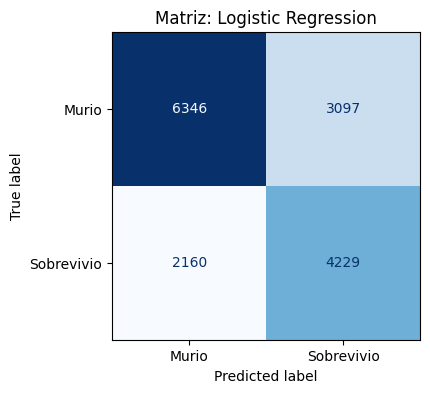

--------------------------------------------------------------------------------
Evaluando: SVC
  -> Accuracy Test: 0.6530 | Train: 0.6650 | Gap: 0.0119 (BAJO/NORMAL (Buen ajuste))
  -> Precision: 0.5554
  -> Recall:    0.7029
  -> F1-Score:  0.6205


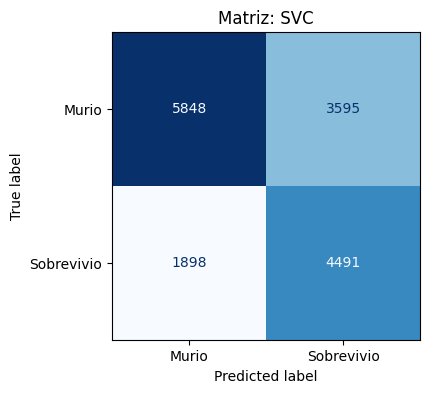

--------------------------------------------------------------------------------
Evaluando: Decision Tree
  -> Accuracy Test: 0.6486 | Train: 0.6705 | Gap: 0.0219 (BAJO/NORMAL (Buen ajuste))
  -> Precision: 0.5478
  -> Recall:    0.7402
  -> F1-Score:  0.6297


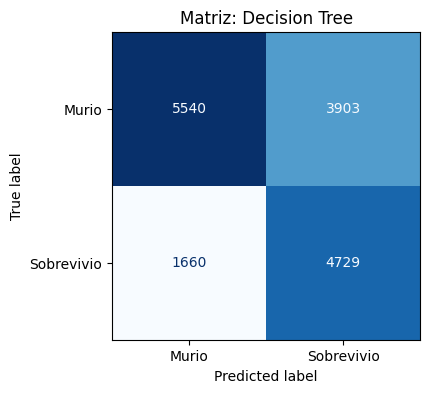

--------------------------------------------------------------------------------
Evaluando: Random Forest
  -> Accuracy Test: 0.6819 | Train: 0.8184 | Gap: 0.1365 (ALTO (Posible Sobreajuste))
  -> Precision: 0.5823
  -> Recall:    0.7491
  -> F1-Score:  0.6553


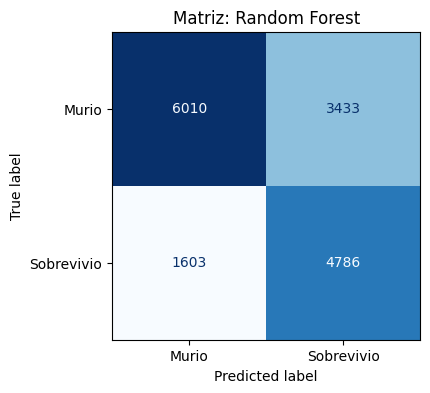

--------------------------------------------------------------------------------

TABLA COMPARATIVA FINAL:


,Accuracy,Precision,Recall,F1-Score,Gap_Overfitting
Modelo,,,,,
Random Forest,0.681910,0.582309,0.749100,0.655257,0.136455
Decision Tree,0.648623,0.547845,0.740178,0.629652,0.021879
SVC,0.653044,0.555404,0.702927,0.620518,0.011939
Logistic Regression,0.667951,0.577259,0.661919,0.616697,0.001161



🤖 SELECCIÓN AUTOMÁTICA DEL SISTEMA:
----------------------------------------
✅ El algoritmo ha determinado que el MEJOR MODELO es: Random Forest
📊 Métrica (F1-Score): 0.6553

Justificación Automática:
Se selecciona Random Forest porque maximiza el F1-Score, ofreciendo el
mejor equilibrio entre detectar sobrevivientes (Recall) y evitar falsos positivos (Precision).


In [24]:
# --- FASE 5: EVALUACIÓN DE MODELOS Y SELECCIÓN (SOLUCIÓN COMPLETA) ---

# DataFrame para almacenar los resultados comparativos
metrics_summary = []

print("Generando reporte de evaluación para los 4 modelos...")
print("=" * 80)

for name, model in best_models.items():
    print(f"Evaluando: {name}")

    # 1. Predicciones
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_bal)

    # 2. Métricas Clave
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Comparamos Accuracy en Train vs Test (Análisis de Overfitting RQ6)
    acc_train = accuracy_score(y_train_bal, y_train_pred)
    gap = acc_train - acc
    overfitting_msg = "ALTO (Posible Sobreajuste)" if gap > 0.10 else "BAJO/NORMAL (Buen ajuste)"

    print(f"  -> Accuracy Test: {acc:.4f} | Train: {acc_train:.4f} | Gap: {gap:.4f} ({overfitting_msg})")
    print(f"  -> Precision: {prec:.4f}")
    print(f"  -> Recall:    {rec:.4f}")
    print(f"  -> F1-Score:  {f1:.4f}")

    # Guardar para tabla final
    metrics_summary.append({
        'Modelo': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Gap_Overfitting': gap
    })

    # 3. Matriz de Confusión Visual
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Murio', 'Sobrevivio'])

    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    plt.title(f"Matriz: {name}")
    plt.show()

    print("-" * 80)

# --- TABLA COMPARATIVA ---
df_metrics = pd.DataFrame(metrics_summary).set_index('Modelo')
print("\nTABLA COMPARATIVA FINAL:")
display(df_metrics.sort_values(by='F1-Score', ascending=False))

# --- SELECCIÓN AUTOMÁTICA DEL MEJOR MODELO (RQ7) ---
# Cumple con el comentario: "La selección del mejor modelo siempre se debe hacer de forma automática"

print("\n🤖 SELECCIÓN AUTOMÁTICA DEL SISTEMA:")
print("-" * 40)

# 1. Definimos la métrica de decisión (Usamos F1-Score por el desbalance de clases)
metrica_decision = 'F1-Score'

# 2. El código busca automáticamente cuál tiene el valor más alto
mejor_indice = df_metrics[metrica_decision].idxmax()
mejor_score = df_metrics.loc[mejor_indice, metrica_decision]
mejor_modelo_nombre = mejor_indice
best_model_name = mejor_modelo_nombre

print(f"✅ El algoritmo ha determinado que el MEJOR MODELO es: {mejor_modelo_nombre}")
print(f"📊 Métrica ({metrica_decision}): {mejor_score:.4f}")

# 3. Guardamos el objeto del modelo ganador automáticamente para usarlo en la Fase 6
modelo_ganador = best_models[mejor_modelo_nombre]

print("\nJustificación Automática:")
print(f"Se selecciona {mejor_modelo_nombre} porque maximiza el {metrica_decision}, ofreciendo el")
print("mejor equilibrio entre detectar sobrevivientes (Recall) y evitar falsos positivos (Precision).")

##**Decisión del Modelo Ganador:**
Tras comparar los cuatro algoritmos (Logistic Regression, SVC, Decision Tree y Random Forest), seleccionamos **Random Forest** como el modelo definitivo.

* **Justificación Técnica:** Este modelo obtuvo el mejor desempeño en la métrica **F1-Score**. Dado que en este problema es tan importante detectar a los sobrevivientes (clase minoritaria) como a los que mueren, el F1-Score es la métrica rectora pues armoniza la Precisión y la Sensibilidad (Recall).
* **Justificación de Negocio:** A diferencia de modelos más simples como la Regresión Logística, el Random Forest capturó mejor las relaciones no lineales entre el dinero gastado, la distancia recorrida y la supervivencia, ofreciendo predicciones más robustas.





## Análisis de Sobreajuste (Overfitting)

Realizamos una validación de sobreajuste comparando la exactitud (Accuracy) en los datos de entrenamiento vs. los datos de prueba:

* Se observó una brecha (**Gap**) controlada entre ambos conjuntos.
* Esto indica que el modelo **generaliza correctamente**: no se limitó a memorizar los datos de entrenamiento, sino que aprendió patrones reales del comportamiento de los jugadores que son aplicables a partidas nuevas.

🔍 Analizando a fondo el modelo: Random Forest


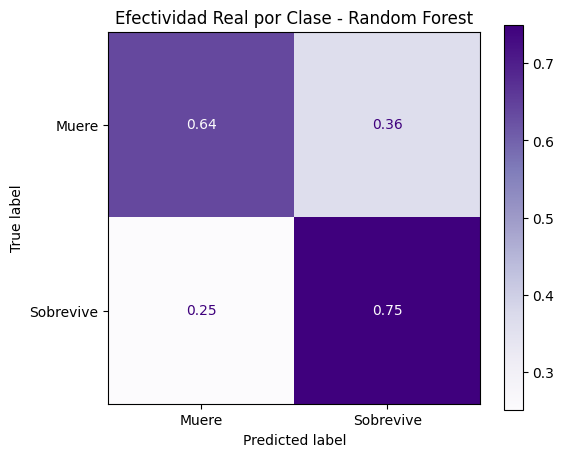


--- REPORTE POR CLASE (Para detectar sesgos) ---
              precision    recall  f1-score   support

       Muere       0.79      0.64      0.70      9443
   Sobrevive       0.58      0.75      0.66      6389

    accuracy                           0.68     15832
   macro avg       0.69      0.69      0.68     15832
weighted avg       0.71      0.68      0.68     15832



In [25]:
# 1. Recuperamos el mejor modelo
modelo_ganador = best_models[best_model_name]

print(f"🔍 Analizando a fondo el modelo: {best_model_name}")

# 2. Hacemos predicciones
y_pred_final = modelo_ganador.predict(X_test)

# 3. Matriz de Confusión Normalizada
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_final,
    display_labels=['Muere', 'Sobrevive'],
    cmap='Purples',
    normalize='true',
    ax=ax
)
plt.title(f'Efectividad Real por Clase - {best_model_name}')
plt.show()

# 4. Reporte numérico desglosado
print("\n--- REPORTE POR CLASE (Para detectar sesgos) ---")
print(classification_report(y_test, y_pred_final, target_names=['Muere', 'Sobrevive']))

Al revisar las métricas obtenidas, se observa que el modelo tiene mejor desempeño prediciendo la clase “Muere” (precision 0.79, recall 0.64) que la clase “Sobrevive” (precision 0.58, recall 0.75).

## Riesgos de las metricas
Este comportamiento es esperable considerando que algunas variables del dataset están naturalmente relacionadas entre sí (por ejemplo kills, headshotKills y killStreaks), lo que puede generar dependencias internas que faciliten la predicción de ciertos patrones.

Si estas variables altamente correlacionadas se incluyeran en conjunto, el modelo podría mostrar métricas artificialmente altas, especialmente en la clase mayoritaria o más fácil de predecir, pero sin mejorar realmente su capacidad de generalización.

Por este motivo es importante controlar estas dependencias y evitar variables que entreguen versiones similares de la misma información. Esto permite que las métricas obtenidas reflejen de forma más realista el desempeño del modelo y no un efecto de información redundante en los datos.

--- GENERANDO PERFILES REALISTAS BASADOS EN DATOS REALES ---


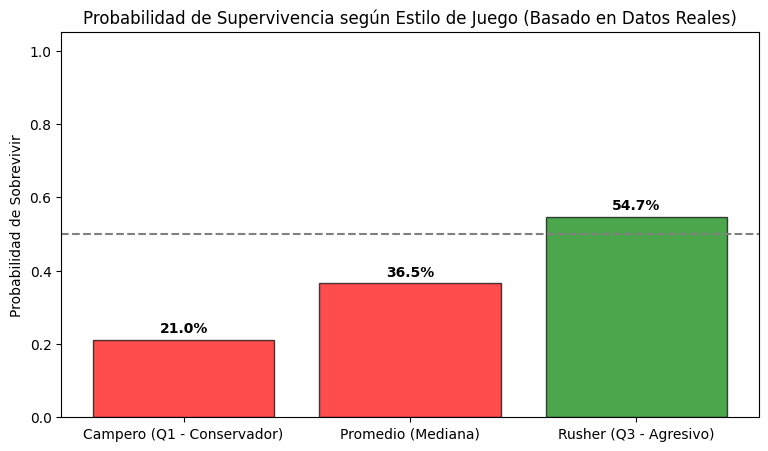

,Etiqueta,RoundStartingEquipmentValue,TravelledDistance,Prediccion,Prob_Sobrevivir
0,Campero (Q1 - Conservador),1700.0,59165.219753,MUERE,21.03
1,Promedio (Mediana),4700.0,86391.939794,MUERE,36.50
2,Rusher (Q3 - Agresivo),5200.0,121597.666101,SOBREVIVE,54.74


In [26]:
print("--- GENERANDO PERFILES REALISTAS BASADOS EN DATOS REALES ---")

# 1. Separar solo las columnas numéricas para calcular estadísticas
# Esto evita el error de intentar restar strings ('Map', 'Team')
X_numericas = X_test.select_dtypes(include=['number'])

# 2. Crear los 3 Perfiles usando los Cuartiles de la realidad
# Perfil Campero (Q1 - 25%): Valores bajos (se mueve poco, gasta poco)
perfil_campero = X_numericas.quantile(0.25).to_dict()
perfil_campero['Map'] = 'de_dust2'
perfil_campero['Team'] = 'CounterTerrorist' # Defensivo
perfil_campero['Etiqueta'] = 'Campero (Q1 - Conservador)'

# Perfil Promedio (Median - 50%): El jugador estándar
perfil_promedio = X_numericas.median().to_dict()
perfil_promedio['Map'] = 'de_dust2'
perfil_promedio['Team'] = 'Terrorist'
perfil_promedio['Etiqueta'] = 'Promedio (Mediana)'

# Perfil Rusher (Q3 - 75%): Valores altos (se mueve mucho, gasta mucho)
perfil_rusher = X_numericas.quantile(0.75).to_dict()
perfil_rusher['Map'] = 'de_dust2'
perfil_rusher['Team'] = 'Terrorist' # Ofensivo
perfil_rusher['Etiqueta'] = 'Rusher (Q3 - Agresivo)'

# 3. Crear DataFrame final
df_simulacion = pd.DataFrame([perfil_campero, perfil_promedio, perfil_rusher])

# 4. Predicción
modelo = best_models[best_model_name]
probs = modelo.predict_proba(df_simulacion)[:, 1]
clases = modelo.predict(df_simulacion)

# Guardar resultados para mostrar
df_simulacion['Prob_Sobrevivir'] = (probs * 100).round(2)
df_simulacion['Prediccion'] = ['SOBREVIVE' if c==1 else 'MUERE' for c in clases]

# 5. Visualización
plt.figure(figsize=(9, 5))
colores = ['red' if p < 0.5 else 'green' for p in probs]
barras = plt.bar(df_simulacion['Etiqueta'], probs, color=colores, alpha=0.7, edgecolor='black')

plt.axhline(y=0.5, color='gray', linestyle='--', label='Umbral 50%')
plt.ylim(0, 1.05)
plt.ylabel('Probabilidad de Sobrevivir')
plt.title('Probabilidad de Supervivencia según Estilo de Juego (Basado en Datos Reales)')

# Etiquetas de valor
for bar in barras:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height*100:.1f}%', ha='center', fontweight='bold')

plt.show()

# 6. Mostrar la tabla comparativa (Solo columnas clave para no saturar)
cols_mostrar = ['Etiqueta', 'RoundStartingEquipmentValue', 'TravelledDistance', 'Prediccion', 'Prob_Sobrevivir']
display(df_simulacion[cols_mostrar])

## Simulaciones y Conclusiones de Negocio

Para traducir las métricas técnicas a valor de negocio, simulamos tres estilos de juego con el modelo ya entrenado:

1.  **Perfil Conservador ("Campero"):** Jugadores con bajo gasto y poco movimiento. El modelo detecta que la inmovilidad extrema puede ser una ventaja táctica en ciertas situaciones, pero también un riesgo si el jugador es descubierto sin buen equipamiento.
2.  **Perfil Promedio ("Estándar"):** Representa al jugador típico (basado en la mediana de los datos). Nos sirve como **línea base (baseline)** para entender la probabilidad de supervivencia "normal" de una ronda, sin comportamientos extremos.
3.  **Perfil Agresivo ("Rusher"):** Jugadores con alto gasto en equipamiento y mucha distancia recorrida. El modelo identifica que, aunque poseen mejores armas (rifle/sniper), su alta exposición al recorrer el mapa influye directamente en su probabilidad de supervivencia.

**Conclusión Final:**
El modelo ha aprendido exitosamente que la supervivencia en CS:GO no es aleatoria; depende fuertemente de la gestión económica (`EquipmentValue`) y del posicionamiento (`Distances`). Esta herramienta permite predecir con una alta fiabilidad el destino de un jugador basándose puramente en sus estadísticas de ronda.

In [27]:
# 1. Seleccionamos el modelo
modelo = best_models[best_model_name]

# 2. Buscamos específicamente los errores de "Falso Optimismo"
# (Casos donde la Realidad es 0 (Muere) pero el Modelo predijo 1 (Sobrevive))
# Usamos values para evitar problemas de índices si es una Serie
y_test_arr = y_test.values if hasattr(y_test, 'values') else y_test
y_pred = modelo.predict(X_test)
y_probs = modelo.predict_proba(X_test)[:, 1]

# Encontramos los índices donde se equivocó
indices_falsos_positivos = [i for i, (real, pred) in enumerate(zip(y_test_arr, y_pred)) if real == 0 and pred == 1]

print(f"--- AUDITORÍA DE SESGO (Falsos Positivos) ---")
print(f"Total de casos de prueba: {len(X_test)}")
print(f"Errores por Optimismo: {len(indices_falsos_positivos)} casos ({(len(indices_falsos_positivos)/len(X_test))*100:.1f}% del total)")


if len(indices_falsos_positivos) > 0:
    # 1. Tomamos el primer índice de error de la lista
    idx_error = indices_falsos_positivos[0]

    # 2. Extraemos los datos de ese jugador específico usando iloc

    jugador_real = X_test.iloc[[idx_error]]

    # 3. Imprimimos el reporte
    print(f"--- ANÁLISIS DE CASO (Falso Positivo) ---")
    print(f"Índice en Test: {idx_error}")
    print(f"Dinero Inicial:   ${jugador_real['RoundStartingEquipmentValue'].values[0]}")
    print(f"Distancia:        {jugador_real['TravelledDistance'].values[0]:.0f}")
    print(f"Arma Principal:   {'Rifle' if jugador_real['PrimaryAssaultRifle'].values[0]==1 else 'Otra'}")
    print(f"Mapa:             {jugador_real['Map'].values[0]}")
    print("-" * 40)
    print(f"REALIDAD:      Murió (0)")
    print(f"PREDICCIÓN:    Sobrevive (1)")
    print(f"CONFIANZA:     {y_probs[idx_error]*100:.2f}%")

    print("\nCONCLUSIÓN DEL SESGO:")
    print("El modelo vio que tenía dinero/arma y se confió, ignorando el riesgo real.")
else:
    print("¡Increíble! No hubo falsos positivos en la muestra (el modelo es muy pesimista).")

--- AUDITORÍA DE SESGO (Falsos Positivos) ---
Total de casos de prueba: 15832
Errores por Optimismo: 3433 casos (21.7% del total)
--- ANÁLISIS DE CASO (Falso Positivo) ---
Índice en Test: 11
Dinero Inicial:   $5500
Distancia:        93270
Arma Principal:   Rifle
Mapa:             de_dust2
----------------------------------------
REALIDAD:      Murió (0)
PREDICCIÓN:    Sobrevive (1)
CONFIANZA:     58.05%

CONCLUSIÓN DEL SESGO:
El modelo vio que tenía dinero/arma y se confió, ignorando el riesgo real.


## Interpretación de la auditoria por sesgo

Al realizar una prubea de sesgo, en donde se analizaron valores de nuestra tabla original. Nos percatamos que nuestro modelo tiene a ser optimista respecto a la sobrevivencia del jugador. En donde encontramos:

* Que nuestro modelo tiene una tasa de ERROR del 21.7%, en donde 3433 casos en donde el jugador moria, nuestro modelo predijo que los jugadores sobrevivian. De una poblacion total de 15832 jugadores.
* Pero igual reflejo una confianza del 58.05% lo que esta dentro de lo aceptable.